Datensatz: https://www.kaggle.com/datasets/aldinwhyudii/student-depression-and-lifestyle-100k-data

In [10]:
import pandas as pd

dataset = pd.read_csv('student_lifestyle_100k.csv')
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Department'] = dataset['Department'].astype('category')
dataset['Stress_Level'] = dataset['Stress_Level'].astype('category')

In [11]:
# Aufteilen nach True und False in der Spalte Depression
depressed = dataset[dataset['Depression']]
not_depressed = dataset[~dataset['Depression']]

# 10.000 zufällige negative Stichproben ziehen
not_depressed_sample = not_depressed.sample(n=10062, random_state=42)

# Datensatz zusammensetzen
balanced_dataset = pd.concat([depressed, not_depressed_sample])

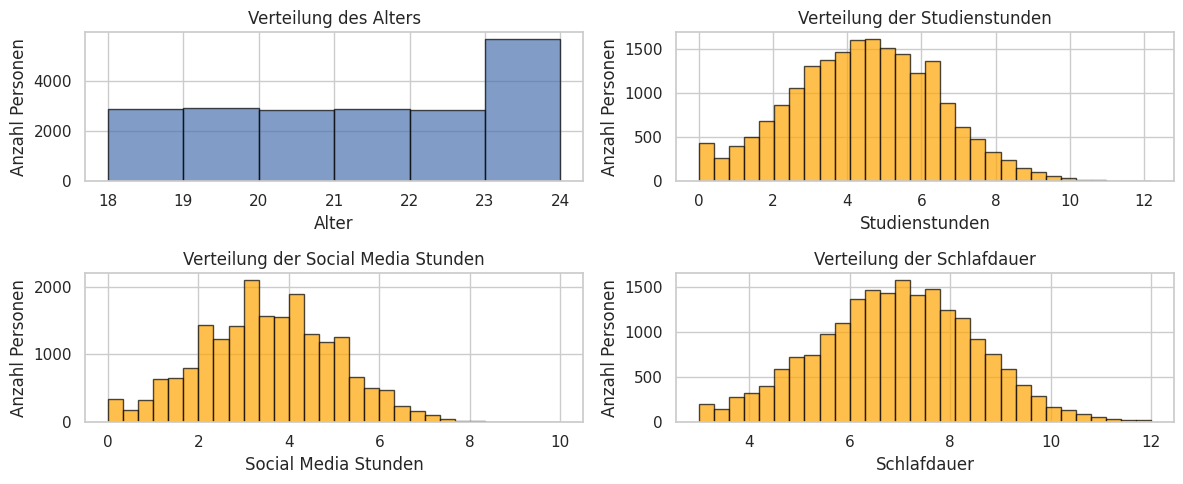

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(2, 2, 1)
plt.hist(balanced_dataset['Age'], bins=6, edgecolor='black', alpha=0.7)
plt.title('Verteilung des Alters')
plt.xlabel('Alter')
plt.ylabel('Anzahl Personen')

plt.subplot(2, 2, 2)
plt.hist(balanced_dataset['Study_Hours'], bins=30, edgecolor='black', alpha=0.7, color='orange')
plt.title('Verteilung der Studienstunden')
plt.xlabel('Studienstunden')
plt.ylabel('Anzahl Personen')

plt.subplot(2, 2, 3)
plt.hist(balanced_dataset['Social_Media_Hours'], bins=30, edgecolor='black', alpha=0.7, color='orange')
plt.title('Verteilung der Social Media Stunden')
plt.xlabel('Social Media Stunden')
plt.ylabel('Anzahl Personen')

plt.subplot(2, 2, 4)
plt.hist(balanced_dataset['Sleep_Duration'], bins=30, edgecolor='black', alpha=0.7, color='orange')
plt.title('Verteilung der Schlafdauer')
plt.xlabel('Schlafdauer')
plt.ylabel('Anzahl Personen')

plt.tight_layout()
plt.show()

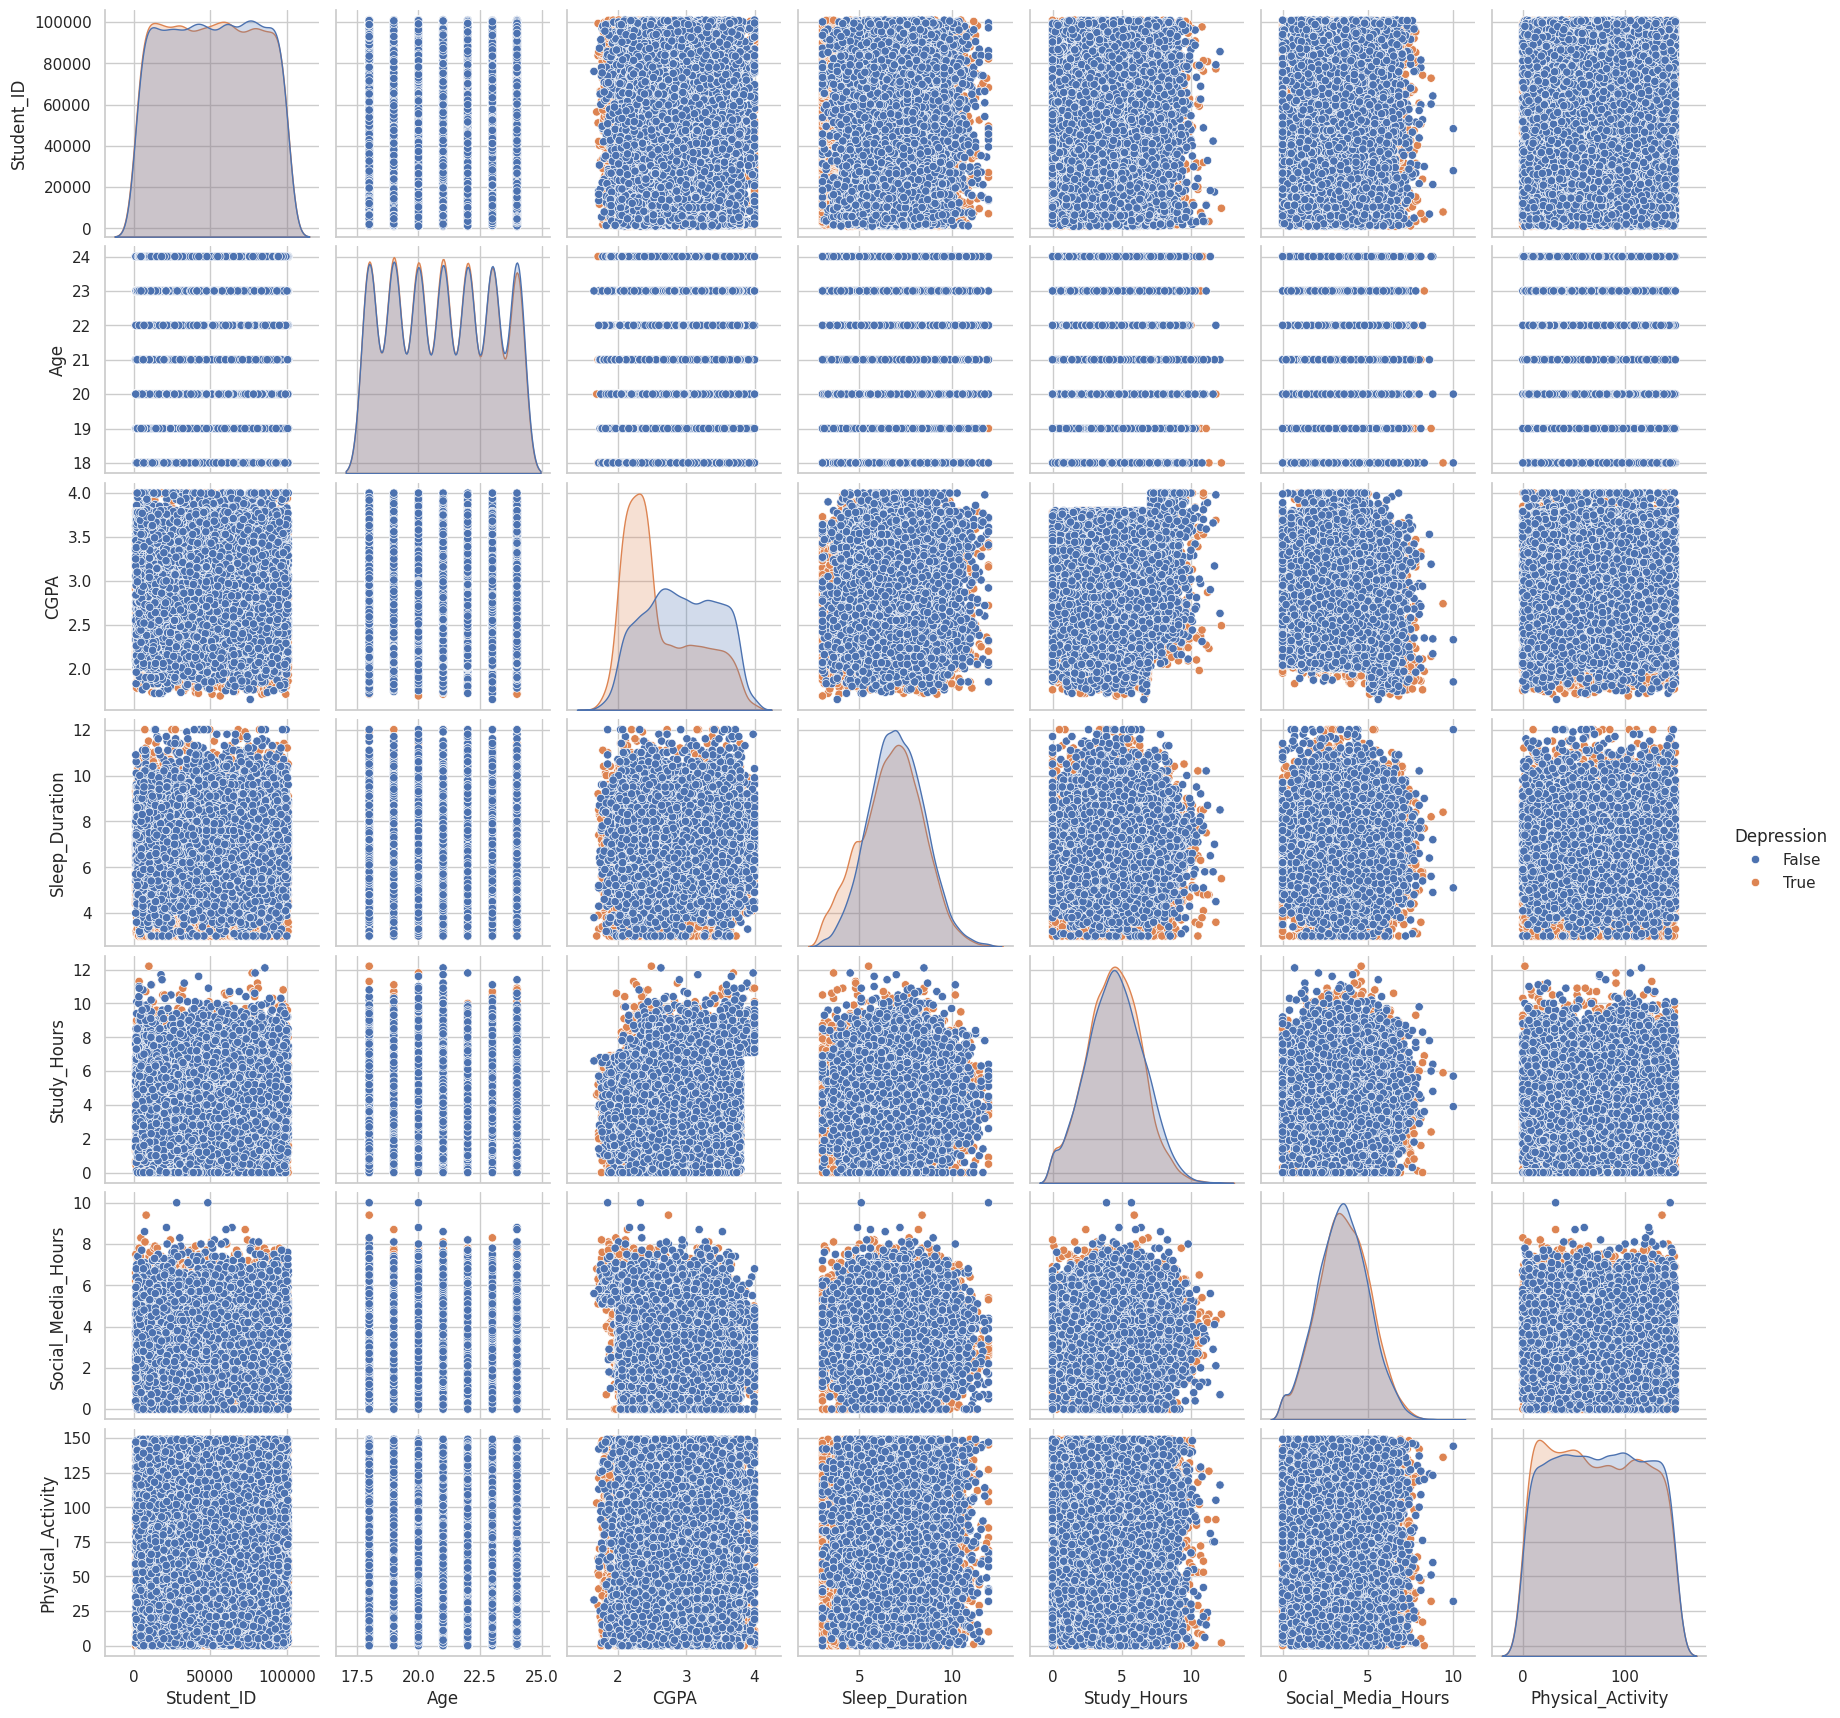

In [13]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.pairplot(balanced_dataset, hue="Depression")

In [14]:
plt.figure(figsize=(10, 8))
# numeric_only=True verhindert den ValueError
correlations = balanced_dataset.corr(numeric_only=True)['Depression'].sort_values(ascending=False)
print("Korrelationen zu Depression:\n", correlations)

Korrelationen zu Depression:
 Depression            1.000000
Social_Media_Hours    0.024778
Student_ID           -0.006937
Age                  -0.008548
Physical_Activity    -0.023565
Study_Hours          -0.027444
Sleep_Duration       -0.089277
CGPA                 -0.284129
Name: Depression, dtype: float64


<Figure size 1000x800 with 0 Axes>

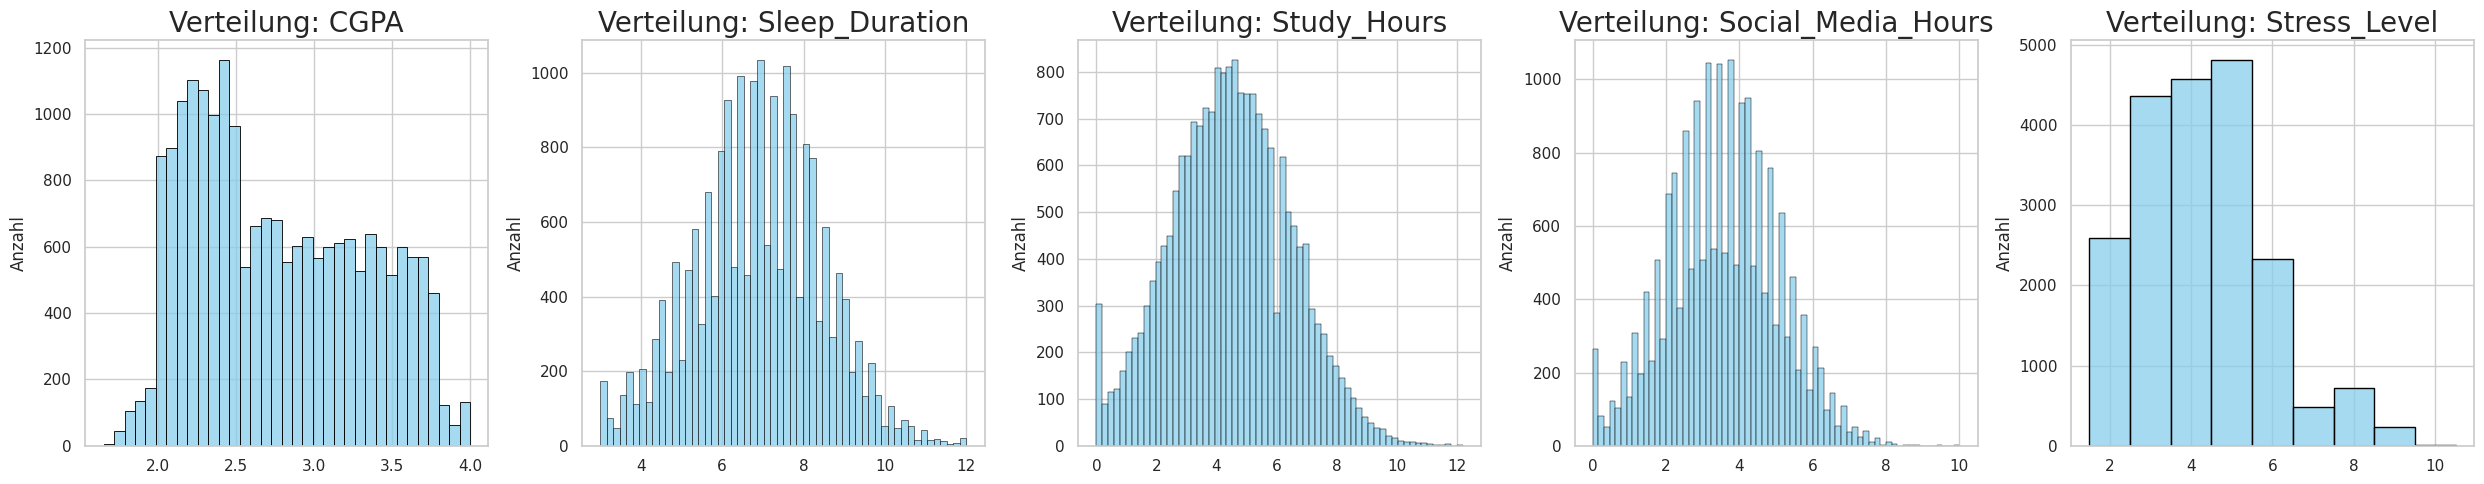

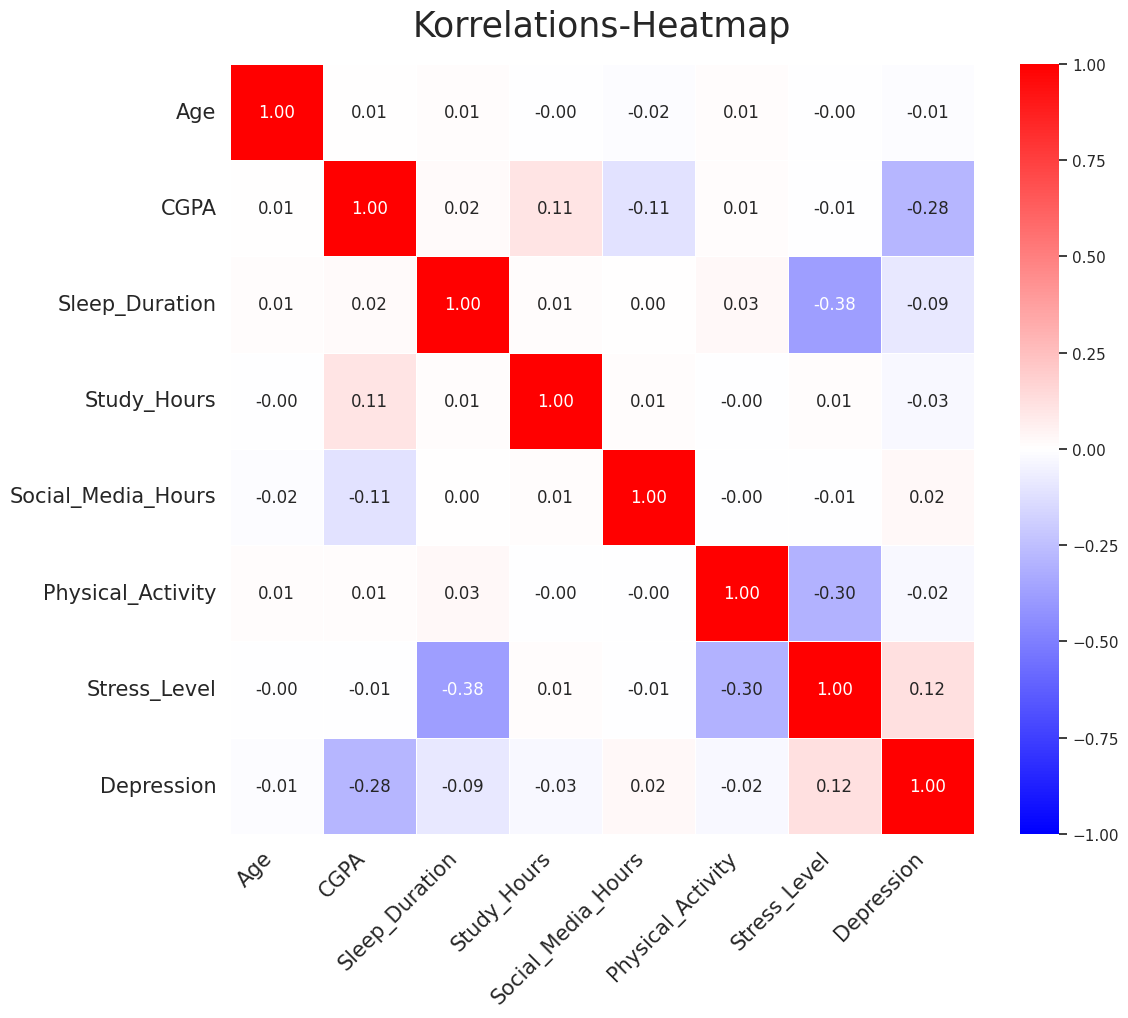

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

folder_path = 'data/visualization'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

df = balanced_dataset

# 1. Histogramme
# Wir wählen nur die relevanten Spalten aus
cols = ['CGPA', 'Sleep_Duration', 'Study_Hours', 
            'Social_Media_Hours', 'Stress_Level']

plt.figure(figsize=(25, 5))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 5, i)
    sns.histplot(df[col], color='skyblue', edgecolor='black')
    plt.title(f'Verteilung: {col}', fontsize=20)
    plt.xlabel('')
    plt.ylabel('Anzahl')

plt.tight_layout()
plt.savefig('data/visualization/histogramme.svg', format='svg', bbox_inches='tight')

plt.show()

# 2. Heatmap der Korrelationsmatrix
# Korrelation berechnen
num_cols = ['Age', 'CGPA', 'Sleep_Duration', 'Study_Hours', 
            'Social_Media_Hours', 'Physical_Activity', 'Stress_Level']
corr_matrix = df[num_cols + ['Depression']].corr()
plt.figure(figsize=(12, 10))

# Heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='bwr',   
            center=0, 
            vmin=-1, 
            vmax=1, 
            fmt=".2f", 
            linewidths=0.5,
            annot_kws={"size": 12}) # Schriftgröße der Zahlen in der Matrix
plt.xticks(rotation=45, ha='right', fontsize=15) 
plt.yticks(fontsize=15)
plt.title('Korrelations-Heatmap', fontsize=25, pad=20)

# Als Vektorgrafik speichern
plt.savefig('data/visualization/correlation_heatmap.svg', format='svg', bbox_inches='tight')
plt.show()